In [1]:
from IPython.display import display

from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import tqdm as tq
from tqdm import tqdm

import string

import nltk
from nltk.corpus import treebank
from nltk.tag import hmm

import watermark

%load_ext watermark
%matplotlib inline


In [3]:
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
text = "They refuse to permit us to obtain the refuse permit"

In [5]:
tokens = nltk.word_tokenize(text)
tags = nltk.pos_tag(tokens)

In [7]:
pprint(tags)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]


In [8]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [9]:
train_data = treebank.tagged_sents()
trainer = hmm.HiddenMarkovModelTrainer()
tagger = trainer.train_supervised(train_data)

In [10]:
pprint(tagger.tag(nltk.word_tokenize(text)))

c:\Users\kamal\Desktop\Cloover\automation_project\NLTk\env_nltk\Lib\site-packages\nltk\tag\hmm.py:333: RuntimeWarning: overflow encountered in cast
  X[i, j] = self._transitions[si].logprob(self._states[j])
c:\Users\kamal\Desktop\Cloover\automation_project\NLTk\env_nltk\Lib\site-packages\nltk\tag\hmm.py:335: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])
c:\Users\kamal\Desktop\Cloover\automation_project\NLTk\env_nltk\Lib\site-packages\nltk\tag\hmm.py:331: RuntimeWarning: overflow encountered in cast
  P[i] = self._priors.logprob(si)


[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'VBP'),
 ('permit', 'VB')]


In [11]:
regexp = [
    (r'^[+-]?[0-9]+(\.[0-9]+)?$', 'CD'),     # cardinal numbers
    (r'^(The|the|A|a|An|an)$', 'AT'),        # articles
    (r'.*able$', 'JJ'),                      # adjectives
    (r'.*ness$', 'NN'),                      # nouns formed from adjectives
    (r'.*ly$', 'RB'),                        # adverbs
    (r'.*s$', 'NNS'),                        # plural nouns
    (r'.*ing$', 'VBG'),                      # gerunds
    (r'.*ed$', 'VBD'),                       # past tense verbs
    (r'.*', 'NN')                            # nouns (default)
]


In [12]:
regexp_tagger = nltk.tag.RegexpTagger(regexp)

In [13]:
regexp_tagger.tag(nltk.word_tokenize(text))

[('They', 'NN'),
 ('refuse', 'NN'),
 ('to', 'NN'),
 ('permit', 'NN'),
 ('us', 'NNS'),
 ('to', 'NN'),
 ('obtain', 'NN'),
 ('the', 'AT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [14]:
text = """Mary had a little lamb, little lamb, 
little lamb. Mary had a little lamb 
whose fleece was white as snow. 
And everywhere that Mary went 
Mary went, MARY went. Everywhere 
that mary went, 
The lamb was sure to go"""


In [15]:
# chunking
sentences = nltk.sent_tokenize(text)
text = sentences[1]
tokens = nltk.word_tokenize(text)
pos_tags = nltk.pos_tag(tokens)

In [17]:
pos_tags

[('Mary', 'NNP'),
 ('had', 'VBD'),
 ('a', 'DT'),
 ('little', 'JJ'),
 ('lamb', 'NN'),
 ('whose', 'WP$'),
 ('fleece', 'NN'),
 ('was', 'VBD'),
 ('white', 'JJ'),
 ('as', 'IN'),
 ('snow', 'NN'),
 ('.', '.')]

In [18]:
sentence = """Two U.S. senators on Wednesday pressed the Federal Trade Commision to prob Tesla"""

In [19]:
tokens = nltk.word_tokenize(sentence)
pos_tags = nltk.pos_tag(tokens)

In [21]:
grammar = r"""
    NP: {<DT>?<JJ.*>*<NN.*>+}
"""

cp = nltk.RegexpParser(grammar)

In [24]:
chunked_tags = cp.parse(pos_tags)

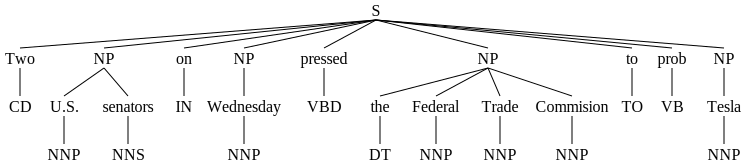

In [26]:
chunked_tags